In [1]:
!pip install yellowbrick
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.model_selection import rfecv
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] =(10,5)
plt.rcParams['figure.dpi'] = 250
import seaborn as sns
sns.set_theme(style='darkgrid', palette = 'rainbow')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\Priyanshu Chauhan\\Downloads\\Pima.csv", index_col = 0)
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
#define x and y

In [4]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
x = df.iloc[:,:-1]
y = df['class']

# Univariate Selection
- We use Chi2 test to perform the feature selection.
- When two features are independent, the observed count is close to the expected count, thus we will have smaller Chi-Square value. So high Chi-Square value indicates that the hypothesis of independence is incorrect.
- In simple words, higher the Chi-Square value the feature is more dependent on the response and it can be selected for model training.

In [6]:
#Chi square for feature selection

In [7]:
test = SelectKBest(score_func=chi2, k = 5)

test.fit(x,y)

SelectKBest(k=5, score_func=<function chi2 at 0x000001CA2A8C85E0>)

In [8]:
test.scores_

array([ 111.51969064, 1411.88704064,   17.60537322,   53.10803984,
       2175.56527292,  127.66934333,    5.39268155,  181.30368904])

In [9]:
x

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [10]:
x.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')

In [11]:
univariate = pd.DataFrame(test.scores_).T
univariate
univariate.columns = x.columns
univariate

,preg,plas,pres,skin,test,mass,pedi,age
0,111.519691,1411.887041,17.605373,53.10804,2175.565273,127.669343,5.392682,181.303689


# Recursive Feature Elimination

In [12]:
#RFE with logistic regression

In [13]:
rfe = RFE(LogisticRegression())

In [14]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
rfe.fit(x,y)

RFE(estimator=LogisticRegression())

In [16]:
rfe.ranking_

array([1, 1, 3, 4, 5, 1, 1, 2])

In [17]:
rfedf = pd.DataFrame(rfe.ranking_).T
rfedf.columns = x.columns

In [18]:
rfedf

,preg,plas,pres,skin,test,mass,pedi,age
0,1,1,3,4,5,1,1,2


# RFECV with Decision Tree

In [19]:
#read the data

In [20]:
df = pd.read_csv("C:\\Users\\Priyanshu Chauhan\\Downloads\\fetal_health.csv")
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


<Axes: xlabel='fetal_health', ylabel='count'>

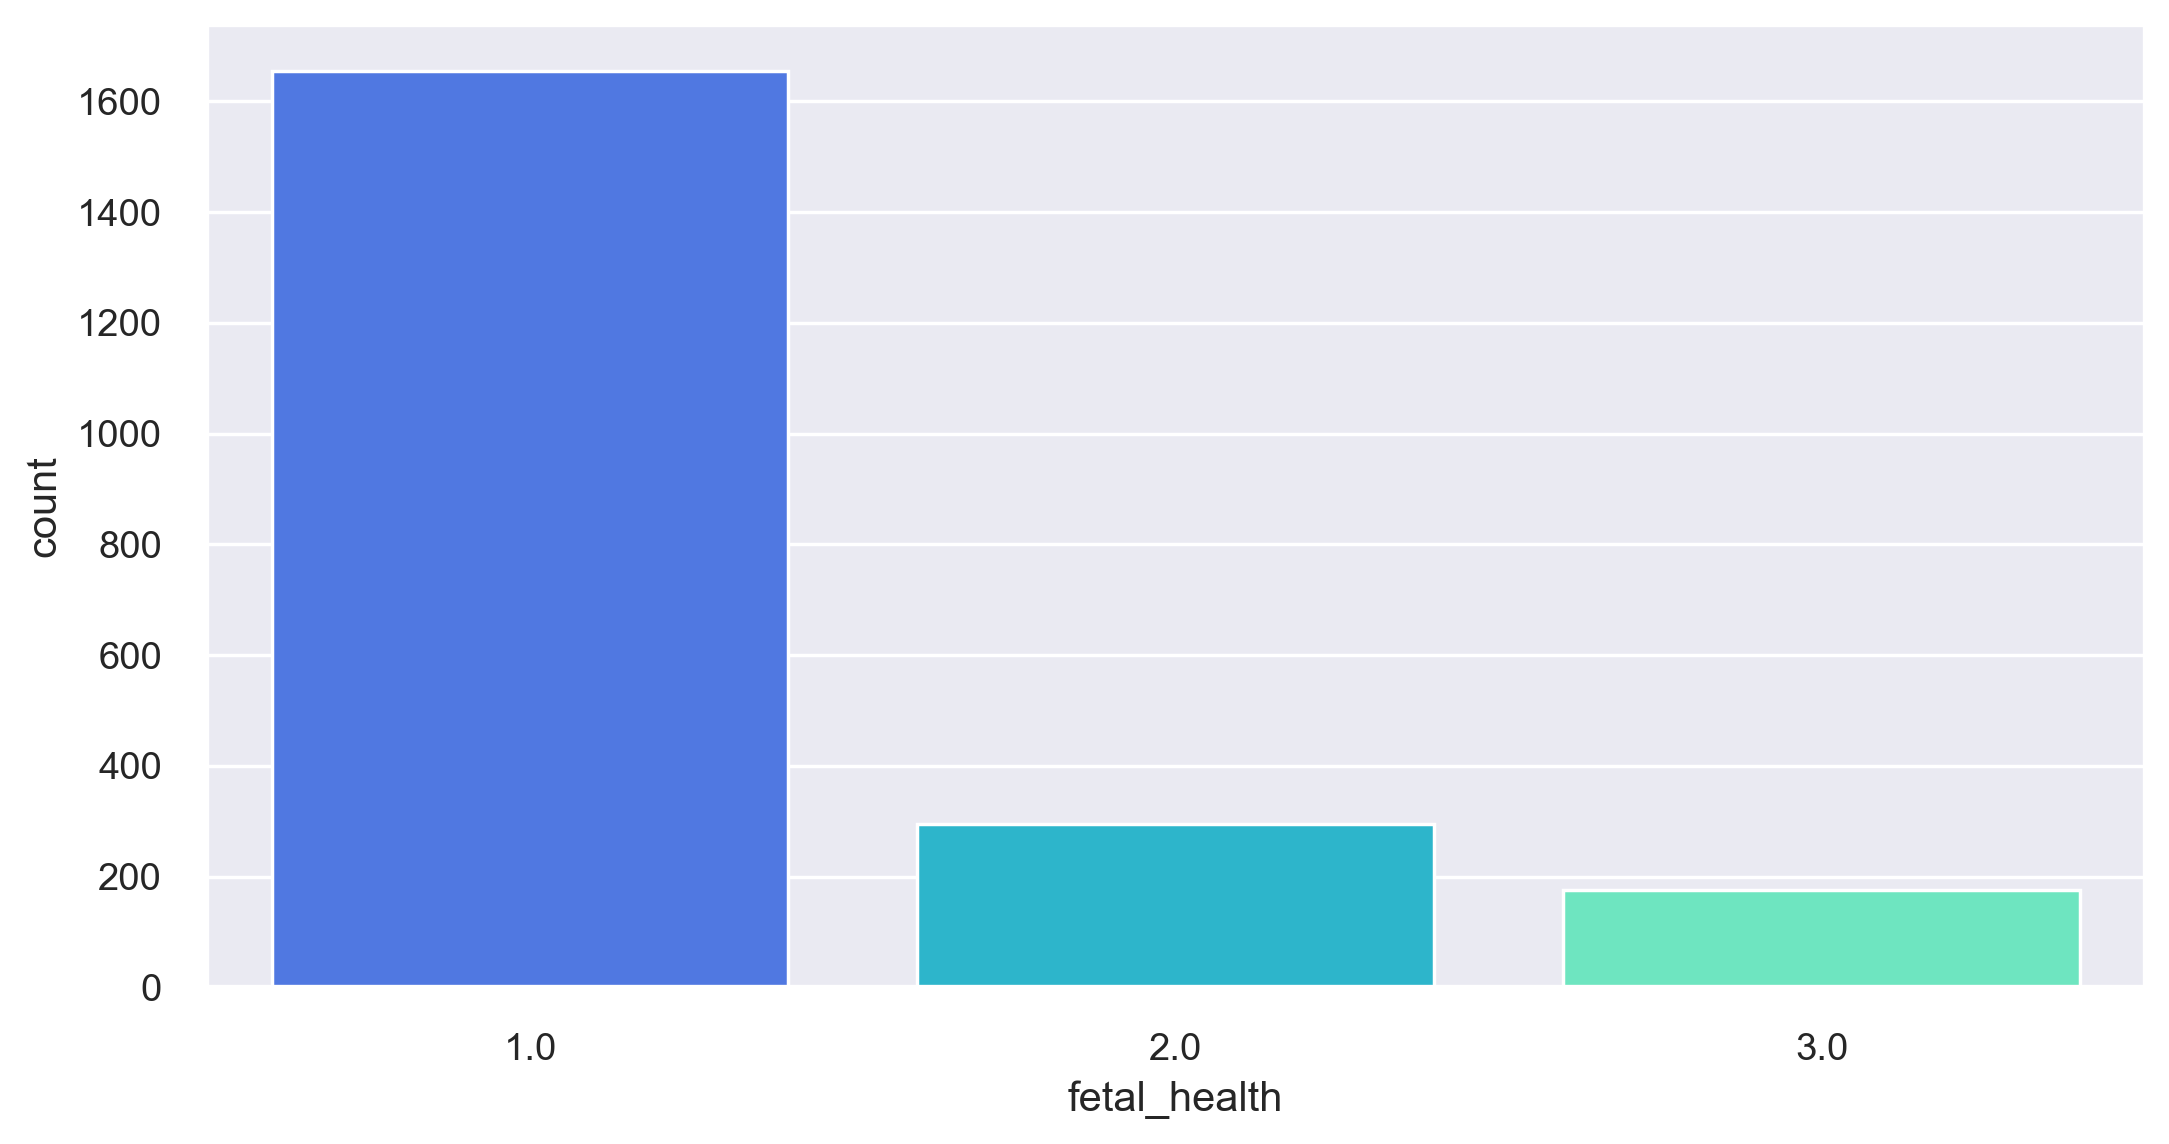

In [21]:
sns.countplot(x = df['fetal_health'])

In [22]:
x = df.iloc[:,:-1]
y = df['fetal_health']

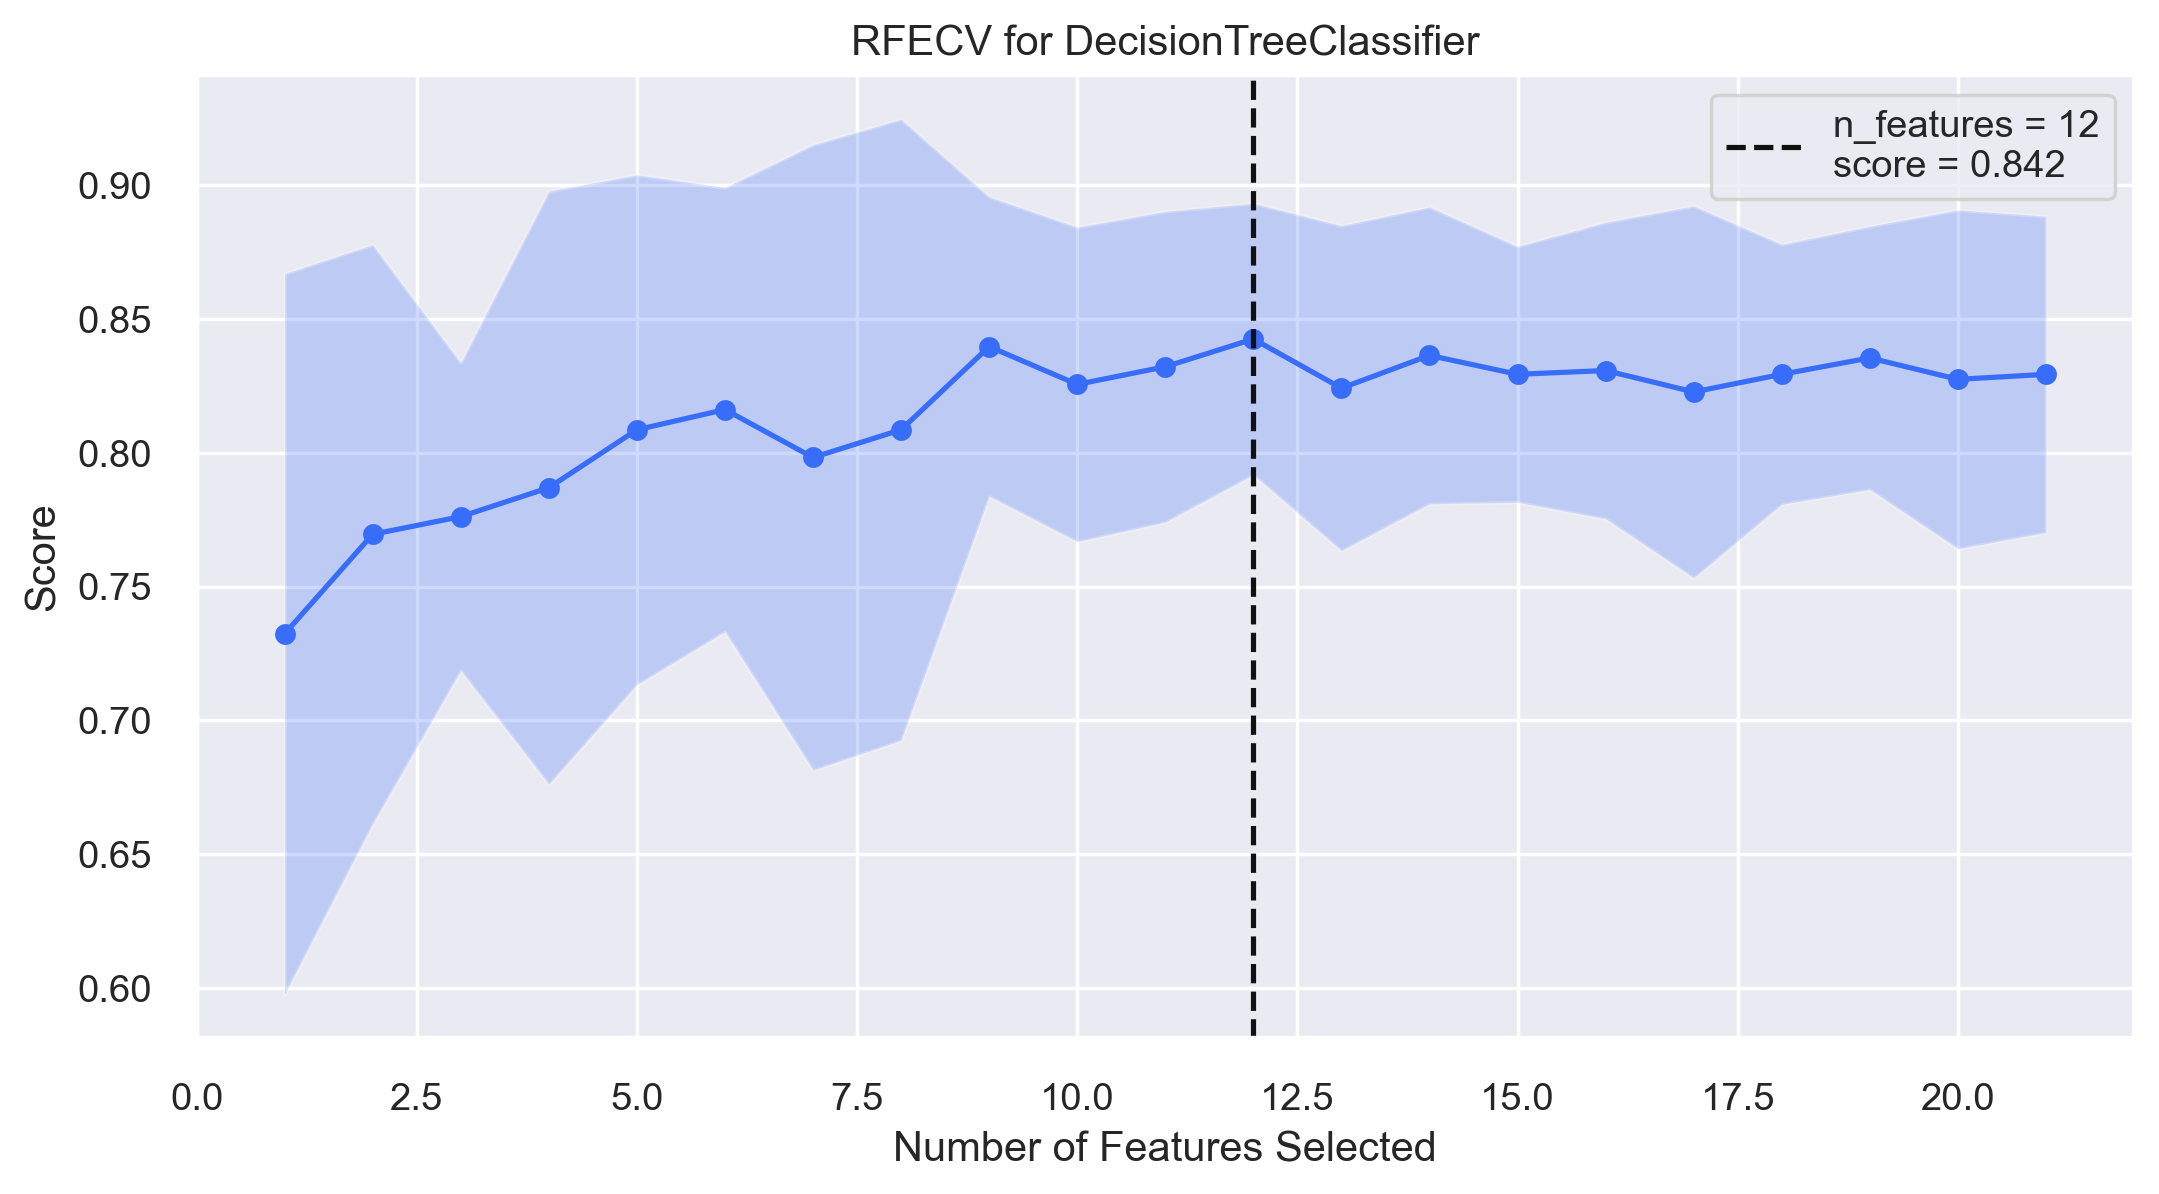

In [23]:
rfe2 = rfecv(DecisionTreeClassifier(),x,y)

In [24]:
rfe2.ranking_

array([ 1,  1,  5,  1,  8, 10,  1,  1,  1,  1,  1,  2,  3,  1,  1,  9,  1,
        1,  6,  4,  7])

In [25]:
rfe_Sel = pd.DataFrame({
    'Ranking' : rfe2.ranking_,
    'Features' : x.columns
})

In [26]:
rfe_Sel

,Ranking,Features
0,1,baseline value
1,1,accelerations
2,5,fetal_movement
3,1,uterine_contractions
4,8,light_decelerations
5,10,severe_decelerations
6,1,prolongued_decelerations
7,1,abnormal_short_term_variability
8,1,mean_value_of_short_term_variability
9,1,percentage_of_time_with_abnormal_long_term_var...


In [27]:
rfe_Sel[rfe_Sel['Ranking']==1]

,Ranking,Features
0,1,baseline value
1,1,accelerations
3,1,uterine_contractions
6,1,prolongued_decelerations
7,1,abnormal_short_term_variability
8,1,mean_value_of_short_term_variability
9,1,percentage_of_time_with_abnormal_long_term_var...
10,1,mean_value_of_long_term_variability
13,1,histogram_max
14,1,histogram_number_of_peaks


# Tree Based method

In [28]:
#Tree Based method

In [29]:
dt = DecisionTreeClassifier()

dt.fit(x,y)

DecisionTreeClassifier()

In [30]:
dt.feature_importances_

array([0.02550008, 0.03833845, 0.00942512, 0.02631903, 0.0035036 ,
       0.        , 0.01413244, 0.12458752, 0.24832285, 0.13373695,
       0.01768757, 0.01420796, 0.01836752, 0.05608907, 0.01841924,
       0.00159087, 0.01956259, 0.21115213, 0.00076908, 0.01611274,
       0.00217519])

In [31]:
ig_sel = pd.DataFrame({
    'IG': dt.feature_importances_,
    'Features' : x.columns
})

In [32]:
ig_sel

,IG,Features
0,0.025500,baseline value
1,0.038338,accelerations
2,0.009425,fetal_movement
3,0.026319,uterine_contractions
4,0.003504,light_decelerations
5,0.000000,severe_decelerations
6,0.014132,prolongued_decelerations
7,0.124588,abnormal_short_term_variability
8,0.248323,mean_value_of_short_term_variability
9,0.133737,percentage_of_time_with_abnormal_long_term_var...


In [33]:
ig_sel.sort_values(by='IG', ascending=False)

,IG,Features
8,0.248323,mean_value_of_short_term_variability
17,0.211152,histogram_mean
9,0.133737,percentage_of_time_with_abnormal_long_term_var...
7,0.124588,abnormal_short_term_variability
13,0.056089,histogram_max
1,0.038338,accelerations
3,0.026319,uterine_contractions
0,0.025500,baseline value
16,0.019563,histogram_mode
14,0.018419,histogram_number_of_peaks


# In-Class Activity:
1- Perform Feature selection(Chi2, RFE, Tree Based) on Wine dataset.